<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Análise Exploratória de Dados de Logística II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Manipulação;</li>
  <li>Visualização;</li>
  <li>Storytelling.</li>
</ol>


---

# **Exercícios**

Este *notebook* deve servir como um guia para **você continuar** a construção da sua própria análise exploratória de dados. Fique a vontate para copiar os códigos da aula mas busque explorar os dados ao máximo. Por fim, publique seu *notebook* no [Kaggle](https://www.kaggle.com/).

---

# **Análise Exploratória de Dados de Logística**

## 1\. Contexto

Esse projeto faz parte da conclusão do módulo 16 do curso de Análise de Dados da [EBAC](https://ebaconline.com.br). A proposta foi de escolher um data set na plataforma [Kaggle](https://www.kaggle.com/) com a finalide de realizar uma Análise Exploratória de Dados(AED).

Atualmente o Brasil vive uma crise epidemiológica de dengue, assunto escolhido para realizar a AED.  Como base de dados foi utilizado o data set com os dados dos casos confirmados de dengue, na cidade de Campinas / SP. Levantamento feito entre os anos de 1998 e 2014, constando o número de casos confimados no município além de dados de temperatura e o volume de chuva ao longo desses anos.

## 2\. Pacotes e bibliotecas

In [ ]:
# importe todas as suas bibliotecas aqui, siga os padrões do PEP8:

import pandas as pd
import seaborn as sns


## 3\. Exploração de dados

In [ ]:
# faça o código de exploração de dados:
# - coleta de dados; > Data Set da kaggle disponivel em:  https://www.kaggle.com/datasets/renangomes/dengue-temperatura-e-chuvas-em-campinassp
df_dengue = pd.read_csv('cases_dengue.csv', delimiter = ',')
df_dengue.tail()

,data,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
199,2014-08-01,55,12.2,20.6,13.1,24.7
200,2014-09-01,40,69.2,23.0,18.6,26.8
201,2014-10-01,40,15.6,24.7,17.2,30.0
202,2014-11-01,57,154.8,25.0,22.1,28.3
203,2014-12-01,37,232.8,24.9,21.3,27.8


In [ ]:
# separando a data entre ano e mes
df_dengue[['ano','mes','dia']] = df_dengue['data'].str.split('-', expand = True)
df_dengue ['ano'] = pd.to_numeric(df_dengue['ano'])
df_dengue ['mes'] = pd.to_numeric(df_dengue['mes'])
# troca a numeracao dos meses pelo nome
meses = {1: "Jan", 2: "Fev", 3: "Mar", 4: "Abr", 5: "Mai",
         6: "Jun", 7: "Jul", 8: "Ago", 9: "Set", 10: "Out", 11: "Nov", 12: "Dez"}
df_dengue['mes'] = df_dengue['mes'].replace(meses)

#exlcui coluna dia
df_dengue.drop(columns =['data', 'dia'],axis=1, inplace=True)

In [ ]:
df_dengue.head()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima,ano,mes
0,237,179.2,25.7,20.2,28.1,1998,Jan
1,331,226.3,25.1,20.0,28.0,1998,Fev
2,562,149.1,24.8,22.4,27.2,1998,Mar
3,187,46.4,22.7,18.1,26.0,1998,Abr
4,32,88.3,19.2,15.7,22.9,1998,Mai


In [ ]:
#renomeando e reordenando colunas
df_dengue.rename(columns={'chuva':'volume-chuva', 'temperatura-media': 'temp-media','temperatura-mininima': 'temp-min', 'temperatura-maxima': 'temp-max'}, inplace= True)
df_dengue = df_dengue[['ano', 'mes', 'casos-confirmados', 'volume-chuva','temp-media','temp-min', 'temp-max']]

In [ ]:
# - wrangling da estrutura
  # linhas x colunas
df_dengue.shape


(204, 7)

In [ ]:
# - wrangling da estrutura
  #colunas
df_dengue.columns


Index(['ano', 'mes', 'casos-confirmados', 'volume-chuva', 'temp-media',
       'temp-min', 'temp-max'],
      dtype='object')

In [ ]:
# - wrangling da estrutura
  #tipos de dados
df_dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ano                204 non-null    int64  
 1   mes                204 non-null    object 
 2   casos-confirmados  204 non-null    int64  
 3   volume-chuva       196 non-null    float64
 4   temp-media         204 non-null    float64
 5   temp-min           204 non-null    float64
 6   temp-max           204 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 11.3+ KB


In [ ]:
# - wrangling da estrutura
  #null para chuva
df_dengue['volume-chuva'].isnull().sum()

8

In [ ]:
# - Schema
  #tipos de dados das colunas
df_dengue.dtypes

ano                    int64
mes                   object
casos-confirmados      int64
volume-chuva         float64
temp-media           float64
temp-min             float64
temp-max             float64
dtype: object

In [ ]:
# - Schema
  #atributos float
df_dengue.drop(['ano', 'mes' ], axis=1).select_dtypes('float64').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
volume-chuva,196.0,116.650000,96.631613,0.8,43.850,86.65,177.925,452.8
temp-media,204.0,22.200980,2.399363,16.4,20.100,22.70,24.225,27.2
temp-min,204.0,17.679412,3.336316,8.2,15.075,18.15,20.400,23.5
temp-max,204.0,25.565196,2.249864,19.1,23.800,26.20,27.200,30.1


In [ ]:
# - Schema
  # atributos int
df_dengue.drop(['ano', 'mes' ], axis=1).select_dtypes('int64').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
casos-confirmados,204.0,357.539216,1741.814759,0.0,6.0,17.5,84.5,20428.0


In [ ]:
# dados faltantes
df_dengue.isna().any()

ano                  False
mes                  False
casos-confirmados    False
volume-chuva          True
temp-media           False
temp-min             False
temp-max             False
dtype: bool

## 4\. Manipulação

In [ ]:
# - controle de qualidade;

In [ ]:
#Resumo dos dados
df_dengue.describe()

,ano,casos-confirmados,volume-chuva,temp-media,temp-min,temp-max
count,204.000000,204.000000,196.000000,204.000000,204.000000,204.000000
mean,2006.000000,357.539216,116.650000,22.200980,17.679412,25.565196
std,4.911031,1741.814759,96.631613,2.399363,3.336316,2.249864
min,1998.000000,0.000000,0.800000,16.400000,8.200000,19.100000
25%,2002.000000,6.000000,43.850000,20.100000,15.075000,23.800000
50%,2006.000000,17.500000,86.650000,22.700000,18.150000,26.200000
75%,2010.000000,84.500000,177.925000,24.225000,20.400000,27.200000
max,2014.000000,20428.000000,452.800000,27.200000,23.500000,30.100000


In [ ]:
# média de volume de chuva por ano e mês
#transform() permite aplicar a funcao media a cada valor do agrupamento
media_por_ano_mes = df_dengue.groupby('mes')['volume-chuva'].transform('mean')

In [ ]:
# substituir os valores nulos pela média por ano e mês
df_dengue['volume-chuva'] = df_dengue['volume-chuva'].fillna(media_por_ano_mes).round()
df_dengue.head()

,ano,mes,casos-confirmados,volume-chuva,temp-media,temp-min,temp-max
0,1998,Jan,237,179.0,25.7,20.2,28.1
1,1998,Fev,331,226.0,25.1,20.0,28.0
2,1998,Mar,562,149.0,24.8,22.4,27.2
3,1998,Abr,187,46.0,22.7,18.1,26.0
4,1998,Mai,32,88.0,19.2,15.7,22.9


## 5\. Visualização

In [ ]:
sns.set(rc={'figure.figsize':(12,8)}) # dimensões para o grafico

In [ ]:
#  total de caso em anos
casos_anos = df_dengue[['ano', 'casos-confirmados']].groupby('ano').agg('sum')


<ipython-input-25-96e41be48b11>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  graf_01 = sns.barplot(data = casos_anos, x ='ano', y ='casos-confirmados', ci = None, palette = 'dark')
<ipython-input-25-96e41be48b11>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graf_01 = sns.barplot(data = casos_anos, x ='ano', y ='casos-confirmados', ci = None, palette = 'dark')


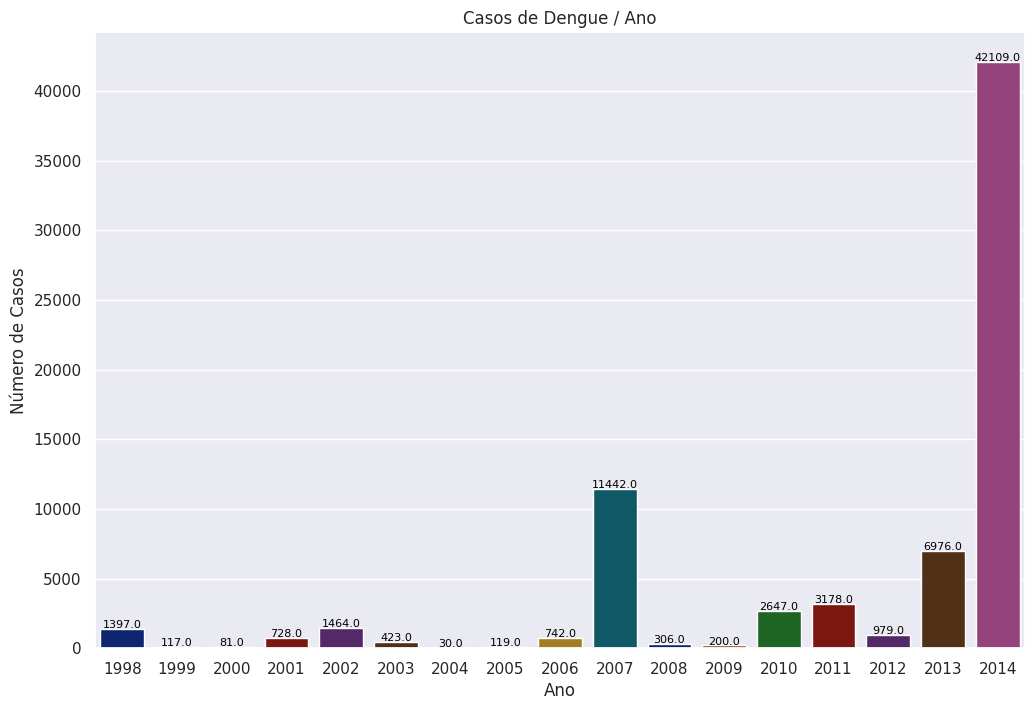

In [ ]:
# Grafico 01 - visualizacao do total a cada ano da serie 2004 - 2014
with sns.axes_style('darkgrid'):
  graf_01 = sns.barplot(data = casos_anos, x ='ano', y ='casos-confirmados', ci = None, palette = 'dark')
  graf_01.set(title = "Casos de Dengue / Ano", xlabel= 'Ano', ylabel = 'Número de Casos')

  #adiciona valores a cada coluna
  for i in graf_01.patches:
    graf_01.annotate(i.get_height(),
                            (i.get_x()+ i.get_width() / 2, i.get_height()),
                            ha='center', va = 'baseline', fontsize = 8,
                            color= 'black', xytext=(0,1),
                            textcoords = 'offset pixels')

<ipython-input-144-c921752cb9c7>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  graf_02= sns.barplot(data = df_months, x ='mes', y ='casos-confirmados', ci = None, palette = 'dark')
<ipython-input-144-c921752cb9c7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graf_02= sns.barplot(data = df_months, x ='mes', y ='casos-confirmados', ci = None, palette = 'dark')


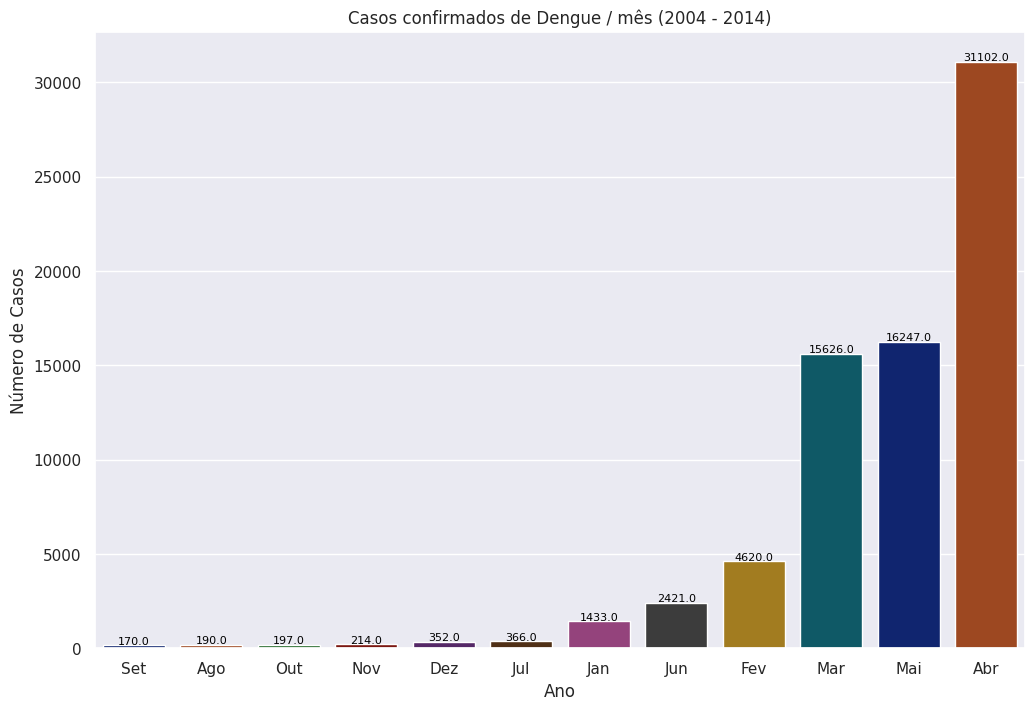

In [ ]:
df_months= df_dengue[['mes','casos-confirmados']].groupby('mes').agg('sum')
df_months = df_months.sort_values(by='casos-confirmados' )
with sns.axes_style('darkgrid'):
  graf_02= sns.barplot(data = df_months, x ='mes', y ='casos-confirmados', ci = None, palette = 'dark')
  graf_02.set(title = "Casos confirmados de Dengue / mês (2004 - 2014)", xlabel= 'Ano', ylabel = 'Número de Casos')

  #adiciona valores a cada coluna
  for i in graf_02.patches:
    graf_02.annotate(i.get_height(),
                            (i.get_x()+ i.get_width() / 2, i.get_height()),
                            ha='center', va = 'baseline', fontsize = 8,
                            color= 'black', xytext=(0,1),
                            textcoords = 'offset pixels')

In [ ]:
# filtro com os dois extremos menor(2004) e maior quantidade de casos(2014)
df_years = df_dengue[df_dengue['ano'].isin([2004, 2014])]
df_y04 = df_dengue[df_dengue['ano'].isin([2004])]
df_y14 = df_dengue[df_dengue['ano'].isin([2014])]


<ipython-input-150-c4ac56e287ba>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graf_03= sns.relplot(data=df_y04, x='mes', y='casos-confirmados', style='ano', palette = 'dark')


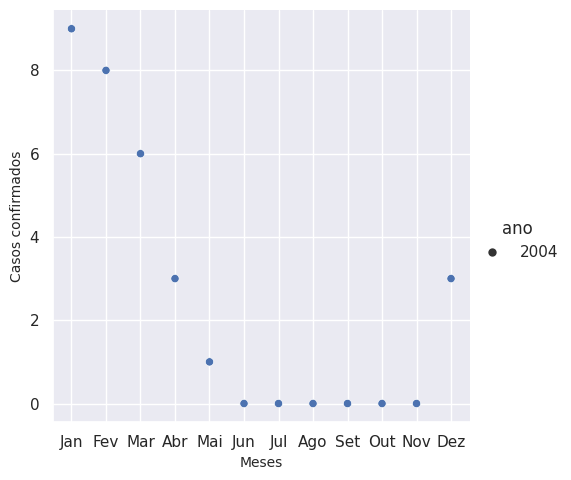

In [ ]:
graf_03= sns.relplot(data=df_y04, x='mes', y='casos-confirmados', style='ano', palette = 'dark')

graf_03.set_xlabels('Meses', fontsize=10)
graf_03.set_ylabels('Casos confirmados', fontsize=10)


<ipython-input-152-d16b1e5fcd8a>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graf_04 = sns.relplot(data=df_y14, x='mes', y='casos-confirmados', style='ano', palette = 'dark')


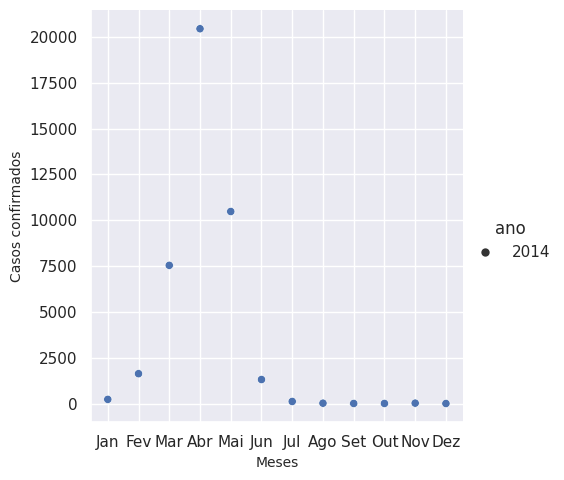

In [ ]:
graf_04 = sns.relplot(data=df_y14, x='mes', y='casos-confirmados', style='ano', palette = 'dark')

graf_04.set_xlabels('Meses', fontsize=10)
graf_04.set_ylabels('Casos confirmados', fontsize=10)

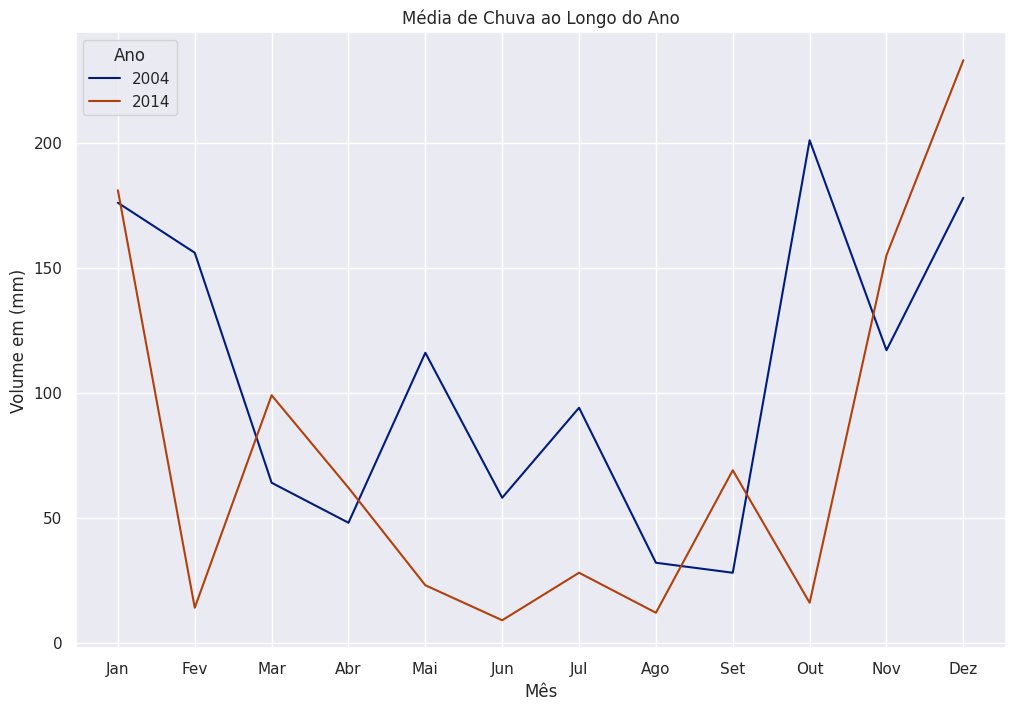

In [ ]:
# variacao da chuma nos dois anos 04/14
with sns.axes_style('darkgrid'):
  graf_05 = sns.lineplot(data=df_years, x='mes', y='volume-chuva', hue='ano', palette='dark')
  graf_05.set(title='Média de Chuva ao Longo do Ano', xlabel='Mês', ylabel='Volume em (mm)');
  graf_05.get_legend().set_title("Ano");

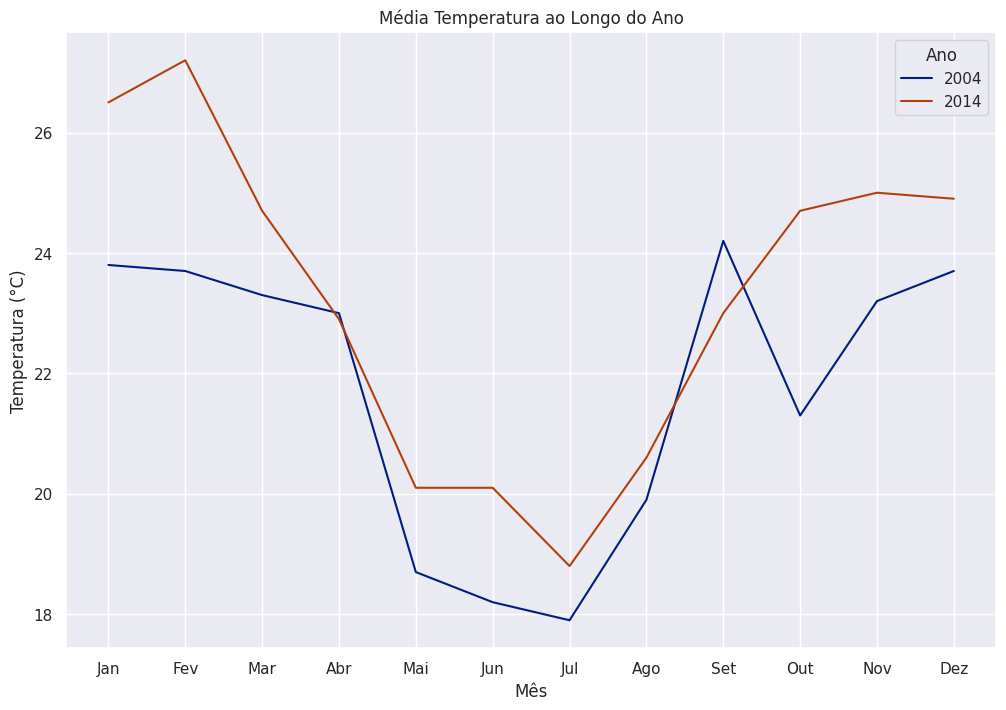

In [ ]:
#variacao datemperatura nos dois anos 04/14
with sns.axes_style('darkgrid'):

  graf_06 = sns.lineplot(data=df_years, x='mes', y='temp-media', hue='ano', palette='dark')
  graf_06.set(title='Média Temperatura ao Longo do Ano', xlabel='Mês', ylabel='Temperatura (°C)');
  graf_06.get_legend().set_title("Ano");

# 6. Insights



Após as etapas de manipulação e exploração dos dados, foram gerados alguns gráficos cum o objetivo de entender melhor o comportamento do aumento no número de casos e levantar alguns insights que talvez possam orientar para um controle da crise que vivemos hoje.


Observando o gráfico(graf_01) com número total de casos confirmados agrupados por cada ano. é possível observar que entre os anos de 1998 a 2006 a doença permaneceu controlada com o número de casos abaixo de 1.000 e na maioria dos anos nesse período abaixo de 100 casos. Apenas em 2007 os casos ultrapassam um pouco mais da faixa dos 10.000 caos. Caindo novamente nos anos seguintes próximos aos índices anteriores, mas subindo exponencialmente no ano de 2014. Quando o munícipio atinge o índice de epidemia.


Segundo a [OMS](https://www.paho.org/pt/brasil), taxas acima de 300 casos por 100 mil habitantes indicam situação epidêmica. Em 2014, a população de Campinas-SP segundo o [IBGE]((https://agenciadenoticias.ibge.gov.br/agencia-sala-de-imprensa/2013-agencia-de-noticias/releases/14659-asi-ibge-divulga-as-estimativas-populacionais-dos-municipios-em-2014)), era de 1.154.617 habitantes, portanto a taxa epidêmica nesse ano foi de 3646/100mil.


A partir do gráfico (graf_02), quando agrupados os dados em total de casos por meses, observa-se que os primeiros meses do ano são os que concentram o maior número de casos, isso se dá pela ocorrência de chuvas nesse período e média elevada da temperara, o que proporciona um ambiente favorável a proliferação do mosquito transmissor da dengue. De acordo com o cenário o período mais crítico é de março a abril.


Na comparação feita entre os anos 2004 e 2014, menor e maior número de casos respectivamente, (graf_03 e graf_04), observa-se que apesar da grande diferença na quantidade de caos, ainda sim se mantém o padrão de concentração das ocorrências nos primeiros 4 meses do ano.Por fim, observou-se com os dados de temperatura e volume médio de chuva, o comportamento do clima, também nesses dois anos (graf_05 e graf_06). Verifica-se através dos gráficos que em 2004 a média de chuva foi maior com relação a 2014, ao longo dos 4 primeiros meses do ano, em contrapartida a média de temperatura em 2004 para o mesmo período é mais baixa, quando comparados os anos, o que talvez seja um fator favorável ao mosquito e tenha contribuído no grande número de casos, relação que precisa ser melhor analisada quando cruzada com dados de estudos sobre o mosquito transmissor da dengue, entre outros fatores climáticos e até mesmo sociais.


Analisando os dados conclui-se que houve uma crescente no número de casos ao longo do tempo, fatores como o aumento da população, a ocupação de áreas preservadas, falta de saneamento, que são problemas comuns nos grandes centros urbanos, de certa forma contribuem para um ambiente de proliferação do mosquito transmissor da dengue e potencializam as variantes climáticas que também tem influência na reprodução do mosquito, como o aquecimento global, o regime de chuvas, etc. É um tema multidisciplinar, e para que possamos entender melhor como gerenciar e controlar essa doença, requer que se aprofunde as pesquisas, cruzando informações de forma ampla e analítica.
